In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
# Replace 'input_file_path' with the path to your input file.

input_file_path = "H:\\moon\\OneDrive\\Desktop\\movies.dat"

# Replace 'output_file_path' with the desired path for the output .csv file.


output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding.


df_movie = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file.

df_movie.to_csv(output_file_path, index=False)
df_movie.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:

df_movie.columns=['Movie_ID', 'Movie_name', 'Category']
df_movie.dropna(inplace=True)
df_movie.head(20)



,Movie_ID,Movie_name,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
df_movie.tail()

,Movie_ID,Movie_name,Category
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [6]:
df_movie.shape

(3883, 3)

In [7]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_ID    3883 non-null   int64 
 1   Movie_name  3883 non-null   object
 2   Category    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
df_movie.isnull().sum()

Movie_ID      0
Movie_name    0
Category      0
dtype: int64

In [9]:
#Loading Rating Dataset
# Replace 'input_file_path' with the path to your input file.

input_file_path = "H:\\moon\\OneDrive\\Desktop\\ratings.dat"

# Replace 'output_file_path' with the desired path for the output .csv file.


output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding.


df_rating = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file.

df_rating.to_csv(output_file_path, index=False)
df_rating.head(20)


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [10]:

df_rating.columns=['ID', 'Movie_ID','Rating', 'TImestamp']
df_rating.dropna(inplace=True)
df_rating.head(20)

,ID,Movie_ID,Rating,TImestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [11]:
df_rating.shape

(1000209, 4)

In [12]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   Movie_ID   1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   TImestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [13]:
df_rating.isnull().sum()

ID           0
Movie_ID     0
Rating       0
TImestamp    0
dtype: int64

In [14]:
df_rating.tail(5)

,ID,Movie_ID,Rating,TImestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [15]:
#Loading Rating Dataset
# Replace 'input_file_path' with the path to your input file.

input_file_path = "H:\\moon\\OneDrive\\Desktop\\users.dat"

# Replace 'output_file_path' with the desired path for the output .csv file.


output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding.


df_user = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file.

df_user.to_csv(output_file_path, index=False)
df_user.head(20)


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [16]:
df_user.columns=['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head(20)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [17]:
df_user.shape

(6040, 5)

In [18]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [19]:
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [20]:
df_user.tail(5)

,UserID,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [21]:
df_user['Gender'].replace({'M':0 ,"F":1} , inplace=True)

In [22]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455


# Here finding Relations Between Dataset

In [23]:
#Distinct values of Moviesids
unique_count =df_rating['Movie_ID'].nunique()
print('Movie_ID:' ,unique_count )

Movie_ID: 3706


In [24]:
#min value of movieids
min_rating=df_rating['Movie_ID'].min()
print("'{}':'{}'".format('Movie_ID' , min_rating))

'Movie_ID':'1'


In [25]:
#max value of movieids
max_rating=df_rating['Movie_ID'].max()
print("'{}':'{}'".format('Movie_ID' , max_rating))

'Movie_ID':'3952'


In [26]:
# distinct value of ids
unique_count_id =df_rating['ID'].nunique()
print('ID :' , unique_count_id)

ID : 6040


In [27]:
#min value of id
min_rating=df_rating['ID'].min()
print("'{}':'{}'".format('ID' , min_rating))

'ID':'1'


In [28]:
#max value of id
max_rating=df_rating['ID'].max()
print("'{}':'{}'".format('ID' , max_rating))

'ID':'6040'


# Now we are merging  datasets

In [29]:
# here i m merging movies , users and rating dataset on basis of identical columns
df_merge =pd.merge(df_rating ,df_user ,left_on='ID' , right_on='UserID')
df_merge =pd.merge(df_rating ,df_movie , left_on='Movie_ID', right_on='Movie_ID' )
df_merge.head()

,ID,Movie_ID,Rating,TImestamp,Movie_name,Category
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [31]:
df_merge.shape

(1000209, 6)

In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ID          1000209 non-null  int64 
 1   Movie_ID    1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   TImestamp   1000209 non-null  int64 
 4   Movie_name  1000209 non-null  object
 5   Category    1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [33]:
df_merge.tail()

,ID,Movie_ID,Rating,TImestamp,Movie_name,Category
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [34]:
df_merge.isnull().sum()

ID            0
Movie_ID      0
Rating        0
TImestamp     0
Movie_name    0
Category      0
dtype: int64

In [35]:
# here we r calculating count of users which they r using movie_id and rating
count_rating =df_merge.groupby(['Movie_ID' , 'Rating']).size().reset_index(name= 'UserCount')


In [36]:
print(count_rating)

       Movie_ID  Rating  UserCount
0             1       1         16
1             1       2         61
2             1       3        345
3             1       4        835
4             1       5        820
...         ...     ...        ...
16907      3952       1          9
16908      3952       2         26
16909      3952       3         89
16910      3952       4        181
16911      3952       5         83

[16912 rows x 3 columns]


In [37]:
#now we r finding movies which have rating more than 100
filter_data =count_rating[count_rating['UserCount']>=100]

In [40]:
filter_data= pd.merge(filter_data, df_merge  [['Movie_ID' , 'Rating' ,'Category']])
filter_data

,Movie_ID,Rating,UserCount,Category
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy
...,...,...,...,...
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller


In [58]:
filter_data.head()

,Movie_ID,Rating,UserCount,Category
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy


In [42]:
filter_data.tail()

,Movie_ID,Rating,UserCount,Category
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller
674620,3952,4,181,Drama|Thriller


In [41]:
filter_data.isnull().sum()

Movie_ID     0
Rating       0
UserCount    0
Category     0
dtype: int64

In [44]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674621 entries, 0 to 674620
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Movie_ID   674621 non-null  int64 
 1   Rating     674621 non-null  int64 
 2   UserCount  674621 non-null  int64 
 3   Category   674621 non-null  object
dtypes: int64(3), object(1)
memory usage: 25.7+ MB


In [45]:
filter_data.shape

(674621, 4)

# Now aftr combining all the dataset

In [46]:
data= pd.concat([df_movie , df_rating , df_user] , axis=1)
data.head()

,Movie_ID,Movie_name,Category,ID,Movie_ID,Rating,TImestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,1.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,0.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,0.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,0.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,0.0,25.0,20.0,55455


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Movie_ID    3883 non-null     float64
 1   Movie_name  3883 non-null     object 
 2   Category    3883 non-null     object 
 3   ID          1000209 non-null  int64  
 4   Movie_ID    1000209 non-null  int64  
 5   Rating      1000209 non-null  int64  
 6   TImestamp   1000209 non-null  int64  
 7   UserID      6040 non-null     float64
 8   Gender      6040 non-null     float64
 9   Age         6040 non-null     float64
 10  Occupation  6040 non-null     float64
 11  Zip-code    6040 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


# Data Visualization

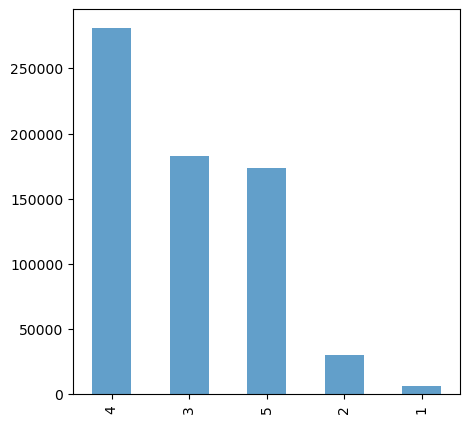

In [57]:
#here i m visualizing all the rating by users
filter_data['Rating'].value_counts().plot(kind='bar', alpha=0.7, figsize=(5 ,5))

plt.show()

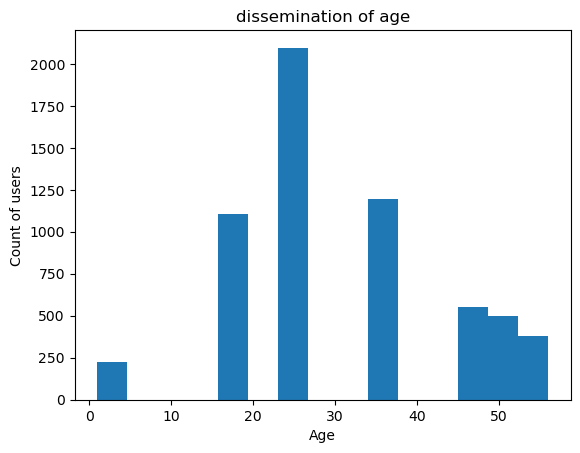

In [58]:
# create histogram for combined dataset
data.Age.plot.hist(bins=15)
plt.title('dissemination of age')
plt.xlabel('Age')
plt.ylabel('Count of users')
plt.show()

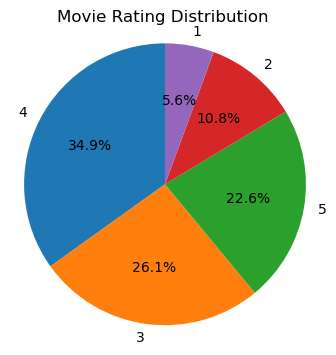

In [65]:
# here i m counting the occurence of each rating
rating_count=df_rating['Rating'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(rating_count , labels=rating_count.index , startangle=90 , autopct='%1.1f%%')
plt.title('Movie Rating Distribution ')
plt.axis('equal')
plt.show()


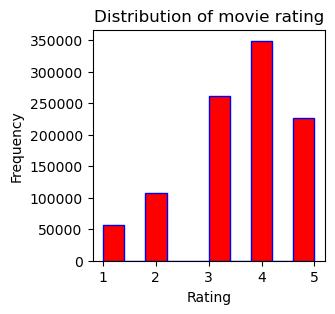

In [71]:
plt.figure(figsize=(3,3))
plt.hist(df_rating['Rating'] , bins=10 ,color='red' ,edgecolor='blue')
plt.title('Distribution of movie rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# now i m building  model 

In [72]:
first_800=filter_data[800:]
first_800.dropna(inplace=True)

C:\Users\moon\AppData\Local\Temp\ipykernel_12428\2285576053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_800.dropna(inplace=True)


# Model Training

In [ ]:
# splitting data into training and testing
x =first_800.drop(['Category'] , axis=1)
y= first_800['Rating']
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=0.2 ,random_state=4)
print(x.shape , x_train.shape , x_test.shape)
print(y.shape , y_train.shape , y_test.shape)


In [82]:
model = LogisticRegression()

In [86]:
x_encoded =pd.get_dummies(x)
model.fit(x_train , y_train)


C:\Users\moon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [88]:
#training accuracy
log=round(model.score(x_train , y_train)*100,2)
print(log)

49.85


In [89]:
#testing accuracy
log=round(model.score(x_test, y_test)*100,2)
print(log)

49.74


In [92]:
y_predict=model.predict(x_test)
mse=mean_squared_error(y_test , y_predict)
print('mean square error is ' , mse)

mean square error is  0.8091344191741179


In [94]:
#root mean square error
print('root mean square error is',np.sqrt(mse))


root mean square error is 0.8995189932258896
